In [1]:
import pandas as pd
from inspect_tables import plot_date_relplot, targhe, read_data, overview, draw_report
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path

pd.options.display.max_columns = 100

In [2]:
veicoli = pd.read_excel("excels/SEA_Flotta_Elenco_Veicoli.xlsx", skiprows=lambda x: x > 341) # il file contiene altre cose dopo
veicoli = veicoli.drop(veicoli.columns[-5:-2], axis=1)[veicoli.TARGA.isin(targhe)]\
          .reset_index(drop=True).rename(columns=lambda x: x.strip().replace("\n", " ").title())
veicoli["plate"] = veicoli.Targa

veicoli["Sistema Gps Tracking"] = veicoli["Sistema Gps Tracking"].str.replace(' ', '').str.split('+')#.unique()
veicoli = veicoli.explode("Sistema Gps Tracking")#.groupby(['Targa', 'Sistema Gps Tracking']).first()

fatture = pd.read_excel("excels/eventi_manutenzioni_esterne (da fatture).xlsx")
fatture.Apertura_commessa = pd.to_datetime(fatture.Apertura_commessa)
display(veicoli.head(), fatture.head())

,N,Fabb.,Data Immatricolazione,Intestatario Libretto,"Titolo Di Possesso (N=Noleggio, L=Leasing, P=Proprieta, R=Riservato Dominio)",Disponibilita,Data Inizio Disponibilita,Data Fine Disponibilita,Data Scadenza Leasing/Riservato Dominio,Iscrizione Albo,Cat. Albo,Direttiva Ce,Euro,"F2 (Da Libretto), Massa Max Pieno Carico",Portata In Kg,Recupero Accise,Targa,N. Contratto Leasing,Alimentazione,Scadenza Tachigrafo,Prima Verifica Periodica Inail,Scadenza Verifica Periodica Inail,Matricola Inail/Ispesl,Cantiere,Vecchia Targa,Telaio,Capacita' Serbatoio,Card Carburante Ip,Sistema Gps Tracking,Seriale Black Box,Antenna I&S,Tag Id. I&S,Tipo,Automezzo,Allestimento,Tipo Attrezzatura,Volume Mc,Matricola Attrezzatura,4.0,Pesatura,Massa Max Qli.,Tara Veicolo Da Libretto,Iscrizione Albo2,Note,Scad. Revisione,Data Seduta Revisione,Contraente Assicuraz,Compagnia Assicuratrice,Scad. Assicuraz. Annuale,Stato Assicurazione,Data Sospensione,Scadenza Premio/Rata,Periodicita' Premio,Importo Annuale,Contratto Di Manutenzione,Km Ultimo Tagliando,Data,plate
0,181.0,2018.0,2019-03-14 00:00:00,Scania Finance Italy s.p.a.,L,si,NaT,NaT,2024-04-12,FV903SK,NaN,595/2009*627/2014C,6.0,18000.0,5220.0,SI,FV903SK,18001905.0,DIESEL,2021-03-15 00:00:00,NaN,N.A.,N.A.,NOVELLO,NaN,YS2P4X20009249086,300.0,7.000989e+18,SCANIAFLEET,NaN,NaN,NaN,COMPATTATORE,SCANIA N323 P280,TECNOINDUSTRIE,ZENIT 16,16.0,TIMP 44643/18,si,NaN,NaN,-5220,NaN,REVISIONE PRESSO TARDITI 04/10/21 ORE 14.00,2021-09-09 00:00:00,2021-10-04,Sea Eco,AXA,2021-12-31,ATTIVA,NaT,2021-06-30,sem.,2045.0,SI SCADENZA13/03/2023,NaN,NaN,FV903SK
0,181.0,2018.0,2019-03-14 00:00:00,Scania Finance Italy s.p.a.,L,si,NaT,NaT,2024-04-12,FV903SK,NaN,595/2009*627/2014C,6.0,18000.0,5220.0,SI,FV903SK,18001905.0,DIESEL,2021-03-15 00:00:00,NaN,N.A.,N.A.,NOVELLO,NaN,YS2P4X20009249086,300.0,7.000989e+18,MOVIMATICA,NaN,NaN,NaN,COMPATTATORE,SCANIA N323 P280,TECNOINDUSTRIE,ZENIT 16,16.0,TIMP 44643/18,si,NaN,NaN,-5220,NaN,REVISIONE PRESSO TARDITI 04/10/21 ORE 14.00,2021-09-09 00:00:00,2021-10-04,Sea Eco,AXA,2021-12-31,ATTIVA,NaT,2021-06-30,sem.,2045.0,SI SCADENZA13/03/2023,NaN,NaN,FV903SK
1,167.0,2018.0,2019-03-11 00:00:00,Tecnoindustrie Merlo s.p.a.,R,si,NaT,NaT,2022-04-10,ZB127AR,NaN,595/2009*2016/1718C,6.0,7500.0,3300.0,SI,ZB127AR,NaN,DIESEL,NON OBBLIGATORIO,N.A.,N.A.,N.A.,NOVELLO,NaN,JAANPR85HJ7100377,NaN,7.000989e+18,VISIRUN,60039269.0,NaN,NaN,MINI COMPATTATORE,ISUZU P75,TECNOINDUSTRIE,AZIMUT 8,8.0,TIS 433613/18,si,NaN,NaN,-3300,NaN,REVISIONE PRESSO TARDITI 06/10/21 ORE 14.00,2021-09-09 00:00:00,2021-10-06,Sea Eco,UNIPOL - LIBRO MAT,2021-12-31,ATTIVA,NaT,2021-06-30,trim.,NaN,NaN,NaN,NaN,ZB127AR
1,167.0,2018.0,2019-03-11 00:00:00,Tecnoindustrie Merlo s.p.a.,R,si,NaT,NaT,2022-04-10,ZB127AR,NaN,595/2009*2016/1718C,6.0,7500.0,3300.0,SI,ZB127AR,NaN,DIESEL,NON OBBLIGATORIO,N.A.,N.A.,N.A.,NOVELLO,NaN,JAANPR85HJ7100377,NaN,7.000989e+18,MOVIMATICA,60039269.0,NaN,NaN,MINI COMPATTATORE,ISUZU P75,TECNOINDUSTRIE,AZIMUT 8,8.0,TIS 433613/18,si,NaN,NaN,-3300,NaN,REVISIONE PRESSO TARDITI 06/10/21 ORE 14.00,2021-09-09 00:00:00,2021-10-06,Sea Eco,UNIPOL - LIBRO MAT,2021-12-31,ATTIVA,NaT,2021-06-30,trim.,NaN,NaN,NaN,NaN,ZB127AR
2,172.0,2018.0,2019-03-11 00:00:00,Tecnoindustrie Merlo s.p.a.,R,si,NaT,NaT,2022-04-10,ZB132AR,NaN,595/2009*2016/1718C,6.0,7500.0,3300.0,SI,ZB132AR,NaN,DIESEL,NON OBBLIGATORIO,N.A.,N.A.,N.A.,NOVELLO,NaN,JAANPR85HJ7100337,NaN,7.000989e+18,MOVIMATICA,60048788.0,NaN,NaN,MINI COMPATTATORE,ISUZU P75,TECNOINDUSTRIE,AZIMUT 8,8.0,TIS 433618/18,si,NaN,NaN,-3300,NaN,REVISIONE PRESSO TARDITI 13/10/21 ORE 14.00,2021-09-18 00:00:00,2021-10-13,Sea Eco,UNIPOL - LIBRO MAT,2021-12-31,ATTIVA,NaT,2021-06-30,trim.,NaN,NaN,NaN,NaN,ZB132AR


,ID,Targa,Telaio,Tipo_veicolo,Km,Apertura_commessa,Anno,Importo,Tipo_manutenzione,Manutenzione_struttura,Descrizione,Commenti
0,1,ZB134AR,JAANPR85HJ7100338,Mini_compattatore,3256.0,2019-09-16,2019,55.51,Ordinaria,Telaio,NaN,NaN
1,2,FV996FV,ZAPS90AGW00002639,Vasca,12767.0,2019-09-18,2019,163.31,Ordinaria,Telaio,NaN,NaN
2,3,FV997FV,ZAPS90AGW00002647,Vasca,9054.0,2019-09-18,2019,141.42,Ordinaria,Telaio,NaN,NaN
3,4,ZB150AR,JAANLR87EH7102953,Mini_compattatore,21117.0,2019-09-18,2019,171.20,Ordinaria,Telaio,NaN,NaN
4,5,EN971TN,ZAPS90CJW00001299,Vasca,115498.0,2019-09-19,2019,221.42,Ordinaria,Telaio,NaN,NaN


---
# General

In [9]:
res_df = pd.DataFrame([])
for dt in tqdm(sorted(Path("dataset").glob("*csv"))):
    tmp = pd.read_csv(dt)
    if "filename" in tmp.columns:
        tmp = tmp.drop("filename", axis=1)
    all_samp = tmp.shape[0]
    tmp = tmp.drop_duplicates()
    single_val = [c for c in tmp.columns if len(tmp[c].unique()) <= 1]
    id_like = [c for c in tmp.columns if len(tmp[c].unique()) == len(tmp)]
    
    res_df = res_df.append({
        "nome fornitore": dt.stem.split("_")[0],
        "folder": dt.stem.split("_")[-1],
        "Tipo dato": None,
        "Veicoli monitorati": len(tmp.plate.unique()) if "plate" in tmp.columns else None,
        "Samples": all_samp,
        "Samples diversi": tmp.shape[0],
        "Tot variabili": tmp.shape[1],
        "Nulle o costanti": len(single_val),
        "Id_like": len(id_like),
        "Utilizzabili": tmp.shape[1] - len(id_like) - len(single_val),
    }, ignore_index=True)

 40%|███▉      | 17/43 [00:01<00:02,  9.73it/s]/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3427: DtypeWarning: Columns (8,22,34,35,36,37,38,39,40,41,42,43) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
 49%|████▉     | 21/43 [00:09<00:14,  1.47it/s]/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3427: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
 88%|████████▊ | 38/43 [01:03<00:38,  7.76s/it]/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3427: DtypeWarning: Columns (23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
100%|██████████| 43/43 [01:28<00:00,  2.0

In [11]:
res_df.to_csv("data.csv")

In [3]:
def read_data(path):
    args = ed({"cut_range": True, "timestamp_name": None, "plate_name": None})
    df = pd.read_csv(path, index_col=0)
    df = df[df.plate.isin(targhe)]
    
#     time_cols = [c for c in df.columns if "time".lower() in c or "date" in c.lower()]
#     for c in time_cols:
#         df[c] = pd.to_datetime(df[c], format="%Y-%m-%dT%H:%M:%S%z", utc=True)
#         df[c] = pd.to_datetime(df[c])
    if args.timestamp_name:
        df = df.rename(columns={args.timestamp_name: "timestamp"})
    else:
        inferred_ts = {"timestamp", "position_timestamp", "datestamp", "PositionDate", "transaction_date", "PositionDateTime"}.intersection(df.columns)
        assert len(inferred_ts) == 1, "Impossibile determinare il nome del timestamp"
        df = df.rename(columns={inferred_ts[0]: "timestamp"})
    df.timestamp = pd.to_datetime(df.timestamp)
    
    if args.plate_name:
        df = df.rename(columns={args.plate_name: "plate"})
    else:
        inferred_pl = [c for c in df.columns if "plate" in c.lower()]
        assert len(inferred_pl) == 1, "Impossibile determinare informazioni di targa"
        df = df.rename(columns={inferred_pl[0]: "plate"})
    if args.cut_range:
        anomalies = df[df.timestamp < "2021-01-01"]
        print(f"Eliminati {len(anomalies)} record anomali antecedenti al 2021 (in date {' '.join(anomalies.timestamp.dt.strftime('%d/%m/%Y').unique())})")
        df = df.drop(anomalies.index)
    if "filename" in df.columns:
        df = df.drop("filename", axis=1)

    df = df.drop([c for c in df.columns if len(df[c].unique()) == 1], axis=1).drop_duplicates().reset_index(drop=True)
    
    return df

In [4]:
tables_to_scan = ["dataset/MOVIMATICA_vehicles.csv", "dataset/SCANIA_VehicleEvaluationReport.csv, dataset/VISIRUN_CurrentPosition.csv"]
tables_to_scan = [Path(p) for p in tables_to_scan]
ds = {}
for path in tqdm(tables_to_scan):
    ds[path.stem] = read_data(path)

  0%|          | 0/2 [00:00<?, ?it/s]


NameError: name 'ed' is not defined

## Euromaster

In [4]:
df_E = pd.read_csv("dataset/EUROMASTER_GetDossiers.csv", index_col=0)
for col in [c for c in df_E.columns if "date" in c.lower()]:
    df_E[col] = pd.to_datetime(df_E[col])
df_E = df_E[df_E.plate.isin(targhe)]

In [5]:
overview(df_E, timestamp="creationDate", fatture=fatture)

Dati raccolti tra 06/2021 e 09/2021
    44 parametri totali monitorati
    103 record nel datalake
    103 record non ripetuti
    43 truck monitorati
    In media 2.395348837209302 misurazioni per ogni mezzo su 5 mesi
    In media 0.03281299776999044 misurazioni/giorno/mezzo (dettaglio successivamente)
    416 fatture associate.
Misurazioni con valore singolo:
fleetManagerId                                        115
fleetManager             SEA SOLUZIONI ECO AMBIENTALI SRL
fleetOwnerId                                          251
fleetOwner               SEA SOLUZIONI ECO AMBIENTALI SRL
totalAmount                                             0
authNumber                                            NaN
ermNote                                               NaN
invoiceDate                                           NaT
cdsNote                                               NaN
fleetNote                                             NaN
isPending                                           Fals

In [6]:
useless_cols = [c for c in df_E.columns if len(df_E[c].unique()) <= 1]
df_E = df_E.drop(useless_cols, axis=1).reset_index(drop=True)

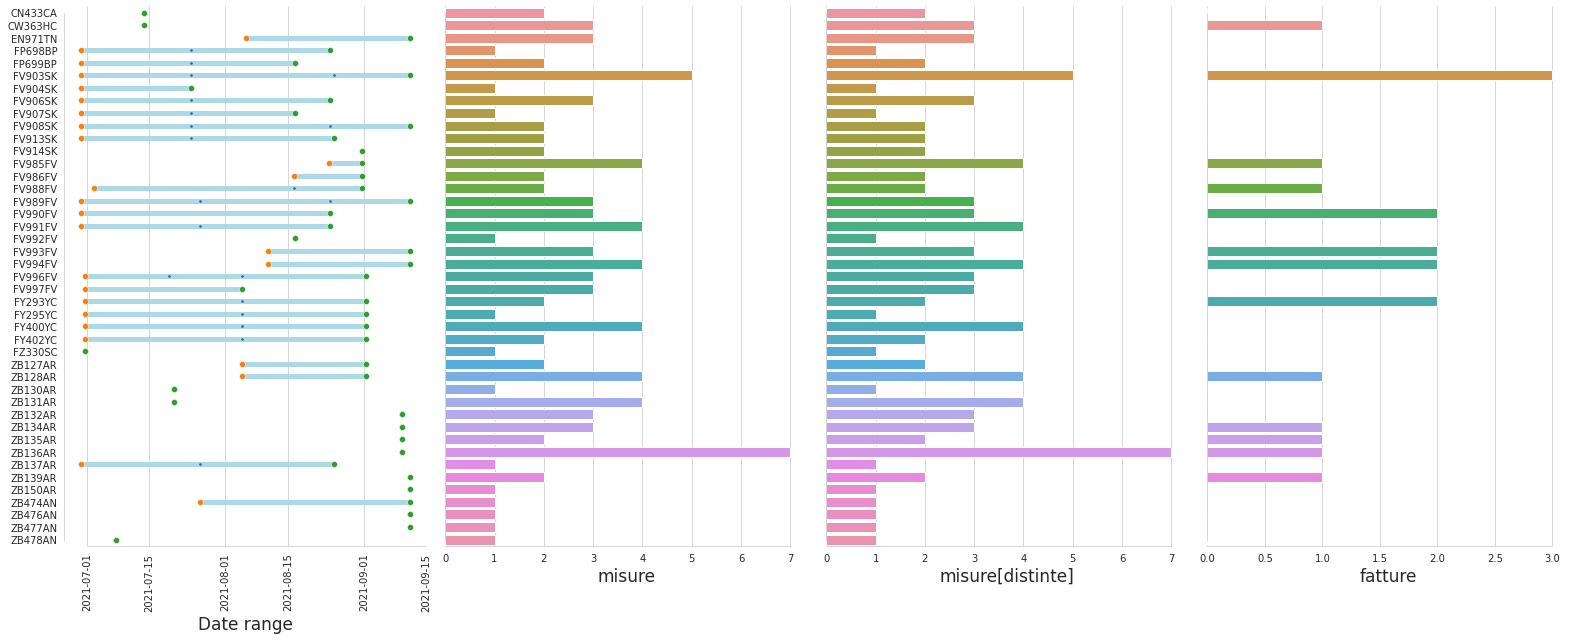

In [7]:
draw_report(df_E, timestamp="creationDate", fatture=fatture, per_day=False)

In [8]:
df_E[df_E.plate == "zb136ar".upper()]

,dossierId,dossierGuid,serviceProviderId,serviceProvider,depot,status,denialDate,cancelingDate,authorizationDate,sendingDate,creationDate,plate,closingDate,extpectedDelivery,vehicle,visitReason,sellOutTotalAmount,sellInTotalAmount,spTotalAmount,nextRecall,euromasterNumber,euromasterNumberString,serviceProviderInvoiceDate,vehicleInternalNumber,isDirectSell,vehicleExpectedDelivery
29,100119,dbce457e-d6c7-487f-977b-67a00a018cf5,721,CASASOLA GOMME SNC - Via Cuneo,ORNAVASSO,2,NaT,NaT,NaT,2021-06-30 15:49:39.360,2021-06-30 15:45:26.195832600,ZB136AR,NaT,NaN,A,EP: RISCOLPITURA,140.00,130.0,130.0,NaN,98014,ERM-98014,NaT,NaN,False,2021-06-30T17:49:33
34,100087,af3221ca-f677-4b03-a2c7-382be9eeada9,877,ERM SP,ORNAVASSO,5,NaT,NaT,2021-06-30 12:15:38.380,2021-06-30 12:15:38.380,2021-06-30 14:15:35.800442000,ZB136AR,2021-06-30 14:22:17.574,NaN,A,EP: ISPEZIONE MASTERCARE,10.00,0.0,0.0,2021-07-29T22:00:00,97982,ERM-97982,NaT,NaN,False,2021-06-30T16:15:33
41,104512,c4251ddf-0111-4df5-94eb-b885a313cd98,721,CASASOLA GOMME SNC - Via Cuneo,ORNAVASSO,2,NaT,NaT,NaT,2021-09-01 12:59:22.224,2021-09-01 12:53:51.034211800,ZB136AR,NaT,NaN,A,EP: SOSTITUZIONE,1118.82,1047.2,233.0,NaN,102400,ERM-102400,NaT,NaN,False,2021-09-01T14:59:17
42,104510,02812120-106b-4d6a-91e2-a0b4779eb139,1574,3 ZETACI SRL,ORNAVASSO,6,NaT,2021-09-01 13:00:03.997,NaT,2021-09-01 10:56:11.088,2021-09-01 12:50:40.031083800,ZB136AR,NaT,NaN,A,EP: SOSTITUZIONE,1118.82,1030.0,215.8,NaN,102398,ERM-102398,NaT,NaN,False,2021-09-01T14:56:06
43,104509,d84b4927-c608-4b8e-9a71-d96a274c748e,877,ERM SP,ORNAVASSO,5,NaT,NaT,2021-09-01 12:54:01.480,2021-09-01 12:54:01.480,2021-09-01 12:48:30.272966800,ZB136AR,2021-09-01 12:54:04.550,NaN,A,EP: ISPEZIONE MASTERCARE,10.00,0.0,0.0,2021-10-31T13:54:02.797,102397,ERM-102397,NaT,NaN,False,2021-09-01T14:53:58
59,102777,0f3fb8c2-ad99-4ca0-abf6-aef63cc720b2,877,ERM SP,ORNAVASSO,5,NaT,NaT,2021-08-04 16:28:19.188,2021-08-04 16:28:19.188,2021-08-04 16:23:21.939964400,ZB136AR,2021-08-04 16:28:22.558,NaN,A,EP: ISPEZIONE MASTERCARE,10.00,0.0,0.0,2021-10-03T16:28:20.713,100668,ERM-100668,NaT,NaN,False,2021-08-04T18:28:16
90,101451,dda6dd06-dfed-4059-b15a-22c70e338f8f,721,CASASOLA GOMME SNC - Via Cuneo,ORNAVASSO,5,NaT,NaT,2021-07-19 07:45:01.694,2021-07-19 04:38:15.067,2021-07-19 08:38:14.124709100,ZB136AR,2021-07-19 10:17:59.398,NaN,A,soccorso,107.00,100.5,100.5,2021-07-28T22:00:00,99342,ERM-99342,NaT,NaN,False,2021-07-19T10:38:05


In [10]:
df_E[df_E.nextRecall.isna()][["visitReason", "status"]]

,visitReason,status
0,EP: ISPEZIONE COSTUMERCARE,3
1,EP: ISPEZIONE COSTUMERCARE,3
2,GOMME,2
3,ispezione,3
4,ispezione,3
5,ispezione,3
6,ispezione,3
7,ispezione,3
8,ispezione,3
9,ispezione,3


Text(0.5, 0, 'giorni')

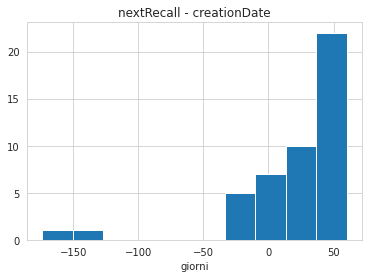

In [11]:
tmp = (pd.to_datetime(df_E.nextRecall) - df_E.creationDate).dt.days.hist()
plt.title("nextRecall - creationDate")
plt.xlabel("giorni")

In [12]:
df_E["delta_nextRecall"] = (pd.to_datetime(df_E.nextRecall) - df_E.creationDate).dt.days
df_E[df_E.delta_nextRecall < 0][["delta_nextRecall", "visitReason"]].reset_index(drop=True)

,delta_nextRecall,visitReason
0,-145.0,MANUTENZIONE ORDINARIA
1,-32.0,MANUTENZIONE ORDINARIA
2,-174.0,Manutenzione ordinaria
3,-26.0,AF: PERMUTA
4,-26.0,AF: PERMUTA
5,-12.0,COSTI TRASPORTO COME DA ACCORDI
6,-12.0,Sostituzione 2 pneumatici


<AxesSubplot:>

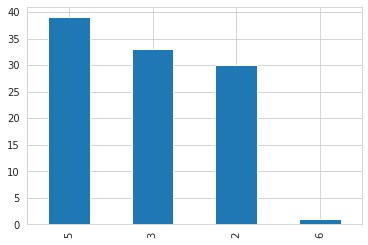

In [18]:
df_E.status.value_counts().plot(kind="bar")

---
## GCT

In [3]:
pd.read_excel("excels/Sorgenti_dati.xlsx", index_col=[0,1]).reset_index().groupby(["nome fornitore", "folder"])["tipo dato "].count().reset_index()#.to_csv("tmp.csv")

,nome fornitore,folder,tipo dato
0,BSMART,Drivers,10
1,BSMART,Pump,34
2,BSMART,TankMovements,11
3,BSMART,Tanks,24
4,BSMART,Transactions,30
5,CGT I-SAT,Vehicle,24
6,COMAC,MachineDataLogEvent,16
7,EUROMASTER,getDossiers,44
8,IP,IpRifornimenti,52
9,MAN CAR SERVICE – RIO,truckState,60


In [12]:
df_G = pd.read_csv("dataset/CGTISAT_INFO.csv", index_col=0)
df_G.Data = pd.to_datetime(df_G.Data)
df_G.head()

,vehicleName,lat,lon,sim,Data,Quadro,Motore,Velocita,Direzione,GPS,Operatore,ContaKm,ContaOre,Batteria,PressioneOlioMotore,TempRefrigeranteMotore,TempOlioIdraulica,StatoRigenerazioneDPF,LivelloCarburante,CarburanteUsato,Consumo,ProssimoTagliando,ChiaveElettronica,BloccoMotore
0,908M K5801248,45.07673,7.68253,393206872591,2021-05-17 07:51:39,Spento,Spento,0Km/h,E (79°),Posizione valida,2,1713Km,550h,"12,6V",200KPa,73°C,29°C,Spento,92%,1888Lt,"3,4Lt/h",-h,Attiva,Spento
1,908M K5801248,45.07671,7.68249,393206872591,2021-08-25 19:48:22,Spento,Spento,1Km/h,O (249°),Ultima posizione,2,2781Km,859h,"13,0V",200KPa,76°C,53°C,Spento,100%,2976Lt,"3,5Lt/h",-h,Attiva,Spento
2,908M K5801248,45.07674,7.68264,393206872591,2021-08-27 01:17:41,Spento,Spento,0Km/h,SE (102°),Ultima posizione,2,2789Km,862h,"12,8V",200KPa,77°C,57°C,Spento,96%,2985Lt,"3,5Lt/h",-h,Attiva,Spento
3,908M K5801248,45.07665,7.68314,393206872591,2021-04-06 13:39:12,Spento,Spento,1Km/h,SE (131°),Ultima posizione,2,1906Km,609h,"12,7V",200KPa,76°C,55°C,Spento,99%,2094Lt,"3,4Lt/h",-h,Attiva,Spento
4,908M K5801248,45.07675,7.68269,393206872591,2021-05-31 19:33:18,Spento,Spento,1Km/h,N (334°),Ultima posizione,2,1877Km,600h,"13,1V",200KPa,73°C,54°C,Spento,64%,2061Lt,"3,4Lt/h",-h,Attiva,Spento


In [13]:
df_G.vehicleName.unique()

array(['908M K5801248'], dtype=object)

In [14]:
overview(df_G, plate="vehicleName", timestamp="Data", fatture=fatture)

Dati raccolti tra 01/2021 e 12/2021
    24 parametri totali monitorati
    565 record nel datalake
    560 record non ripetuti
    1 truck monitorati
    In media 565.0 misurazioni per ogni mezzo su 5 mesi
    In media 1.6765578635014837 misurazioni/giorno/mezzo (dettaglio successivamente)
    0 fatture associate.
Misurazioni con valore singolo:
vehicleName            908M K5801248
sim                     393206872591
PressioneOlioMotore           200KPa
ChiaveElettronica             Attiva
BloccoMotore                  Spento
Name: 0, dtype: object
--> Colonne eliminate


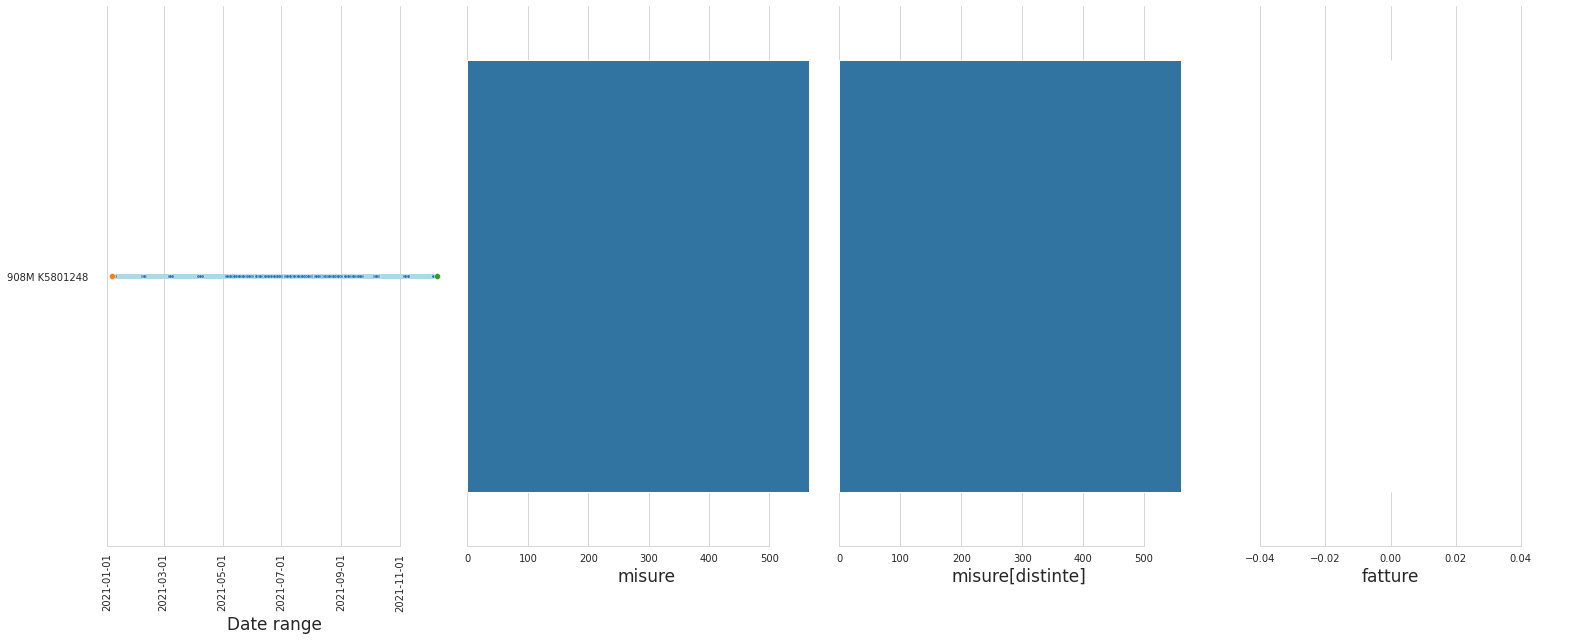

In [15]:
draw_report(df_G, plate="vehicleName", timestamp="Data", fatture=fatture, per_day=False)

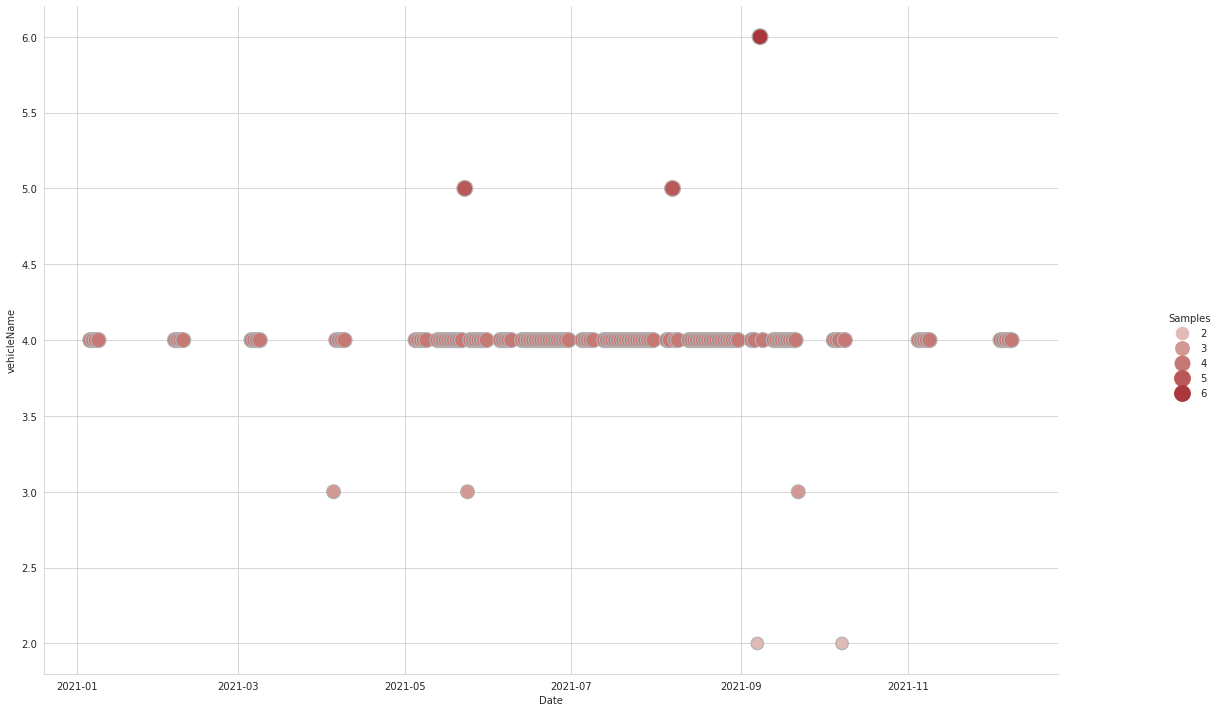

In [16]:
g = plot_date_relplot(df_G, plate="vehicleName", timestamp="Data")

In [18]:
df_G.ProssimoTagliando.unique()

array(['-h', nan], dtype=object)